In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes


In [4]:
data = load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X = data.data
y = data.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
score=r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("r2_score-->",score)
print("RMSE-->",rmse)

r2_score--> 0.4399387660024645
RMSE--> 55.62759745954073


In [16]:
# model building by adding regularization

In [17]:
from sklearn.linear_model import Ridge

In [19]:
model = Ridge(alpha = 0.001)

In [20]:
model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
print("r2_score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.44086641800390625
RMSE 55.581509251007795


In [25]:
# Self trying with Lasso

In [122]:
from sklearn.linear_model import ElasticNet

In [131]:
model = ElasticNet(alpha=0.00001)

In [132]:
model.fit(X_train,y_train)

ElasticNet(alpha=1e-05)

In [133]:
y_pred = model.predict(X_test)

In [134]:
r2_score(y_test,y_pred)

0.4413935700865219

In [135]:
# visualization of ridge regression

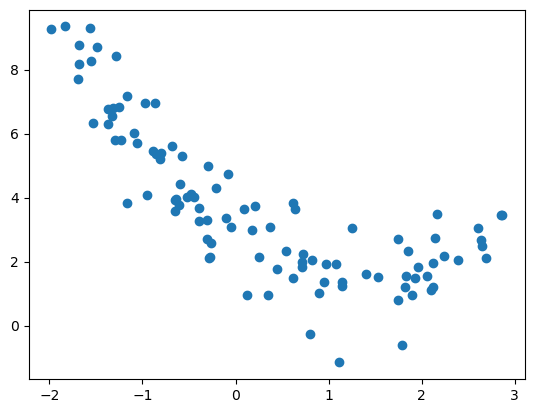

In [136]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

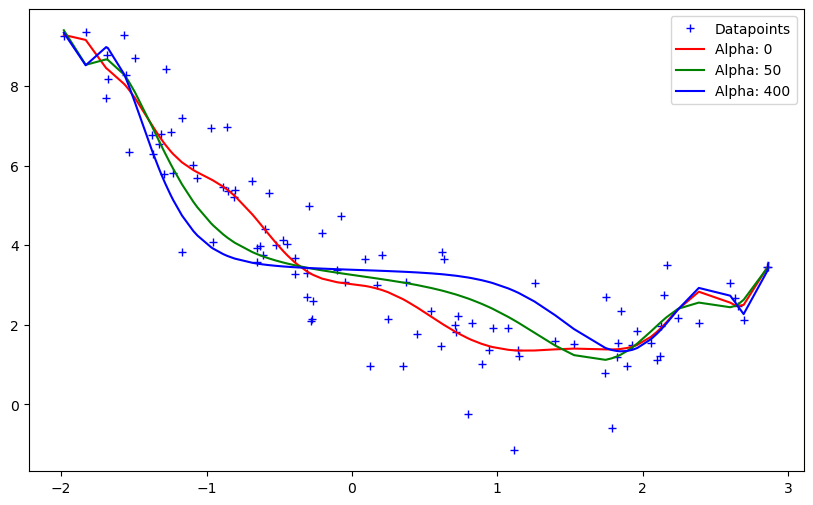

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 50, 400]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()